In [197]:
!pip install sqlalchemy
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [198]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)
engine.dispose()

## Getting to know the data and changing columns names for consistency

In [199]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [200]:
df.rename(columns={'Country':'country', 'Year':'year', 'Status':"status", 'Life expectancy ':'life_expectancy', 'Adult Mortality':'adult_morality',
       'infant deaths':'infant_deaths', 'Alcohol':'alcohol', 'percentage expenditure':'percentage_exp', 'Hepatitis B':'hep_b',
       'Measles ':'measles', ' BMI ':'bmi', 'under-five deaths ':'under5_death', 'Polio':'polio', 'Total expenditure':'total_exp',
       'Diphtheria ':'diphtheria', ' HIV/AIDS':'hiv_aids', 'GDP':'gdp', 'Population':'population',
       ' thinness  1-19 years':'thinness_1-19yrs', ' thinness 5-9 years':'thinness_5-9yrs',
       'Income composition of resources':'income_composition_of_resources', 'Schooling':'schooling'}, inplace=True )

In [201]:
df.head(5)

,country,year,status,life_expectancy,adult_morality,infant_deaths,alcohol,percentage_exp,hep_b,measles,...,polio,total_exp,diphtheria,hiv_aids,gdp,population,thinness_1-19yrs,thinness_5-9yrs,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [202]:
df.nunique()

country                             193
year                                 16
status                                2
life_expectancy                     362
adult_morality                      425
infant_deaths                       209
alcohol                            1076
percentage_exp                     2328
hep_b                                87
measles                             958
bmi                                 608
under5_death                        252
polio                                73
total_exp                           818
diphtheria                           81
hiv_aids                            200
gdp                                2490
population                         2278
thinness_1-19yrs                    200
thinness_5-9yrs                     207
income_composition_of_resources     625
schooling                           173
dtype: int64

In [203]:
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name, df[column_name].unique()))

Unique values in column country are: ['Afghanistan' 'Albania' 'Algeria' "Côte d'Ivoire" 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Slovakia'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country                            2938 non-null object
year                               2938 non-null int64
status                             2938 non-null object
life_expectancy                    2928 non-null float64
adult_morality                     2928 non-null float64
infant_deaths                      2938 non-null int64
alcohol                            2744 non-null float64
percentage_exp                     2938 non-null float64
hep_b                              2385 non-null float64
measles                            2938 non-null int64
bmi                                2904 non-null float64
under5_death                       2938 non-null int64
polio                              2919 non-null float64
total_exp                          2712 non-null float64
diphtheria                         2919 non-null float64
hiv_aids                           2938 non-null

In [205]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_morality',
       'infant_deaths', 'alcohol', 'percentage_exp', 'hep_b', 'measles', 'bmi',
       'under5_death', 'polio', 'total_exp', 'diphtheria', 'hiv_aids', 'gdp',
       'population', 'thinness_1-19yrs', 'thinness_5-9yrs',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

## dealing with null values thru Interpolation since its a time series data

In [206]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_morality                      10
infant_deaths                        0
alcohol                            194
percentage_exp                       0
hep_b                              553
measles                              0
bmi                                 34
under5_death                         0
polio                               19
total_exp                          226
diphtheria                          19
hiv_aids                             0
gdp                                448
population                         652
thinness_1-19yrs                    34
thinness_5-9yrs                     34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [207]:
fill_list = ['life_expectancy', 'adult_morality', 'alcohol','hep_b','bmi','polio', 'total_exp', 'diphtheria', 
            'gdp','population', 'thinness_1-19yrs', 'thinness_5-9yrs',
       'income_composition_of_resources', 'schooling']
             
countries = df['country'].unique()

for place in countries:
    df.loc[df['country']== place, fill_list]= df.loc[df['country'] == place, fill_list].interpolate()
    
df.dropna(inplace=True)

### Changing Adult morality, infant deaths and measles from 1/ 1000 to percentage for consistency. And creating 2 new columns health expenditure in USD and percentage immunized with all 3 vaccines.

In [208]:
df["adult_morality"]= (df["adult_morality"])/10

In [209]:
df["infant_deaths"]= (df["infant_deaths"])/10

In [210]:
df["measles"]= (df["measles"])/10

In [211]:
df["healthexp_usd"]= (df["gdp"]*df["percentage_exp"])/100

In [212]:
df["immunized"]= immunized = (df["hep_b"]+df["polio"]+df["diphtheria"])/3

## Checking for distribution for normailzation

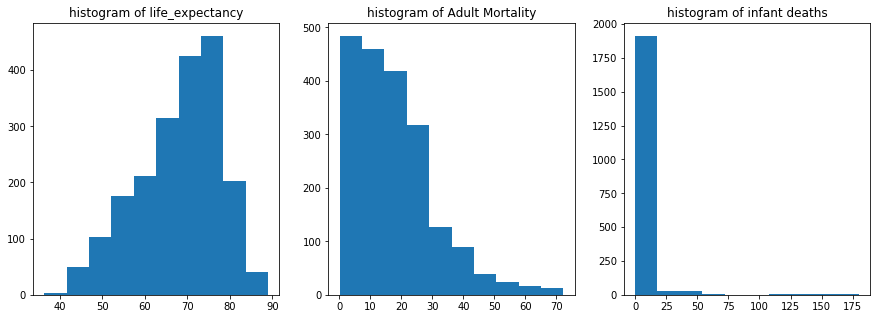

In [213]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.hist(df["life_expectancy"])
plt.title("histogram of life_expectancy")

plt.subplot(1, 3, 2)
plt.hist(df["adult_morality"])
plt.title("histogram of Adult Mortality")

plt.subplot(1, 3, 3)
plt.hist(df["infant_deaths"])
plt.title("histogram of infant deaths")
plt.show()

In [214]:
# adult morlality percenatge mean 17.5% - on an average 18 out of 100 people die betwen ages of 15 and 60
df['adult_morality'].mean()

17.51872169099144

In [215]:
# average life expectancy is about 70 years in the world population.
df['life_expectancy'].median()

69.9

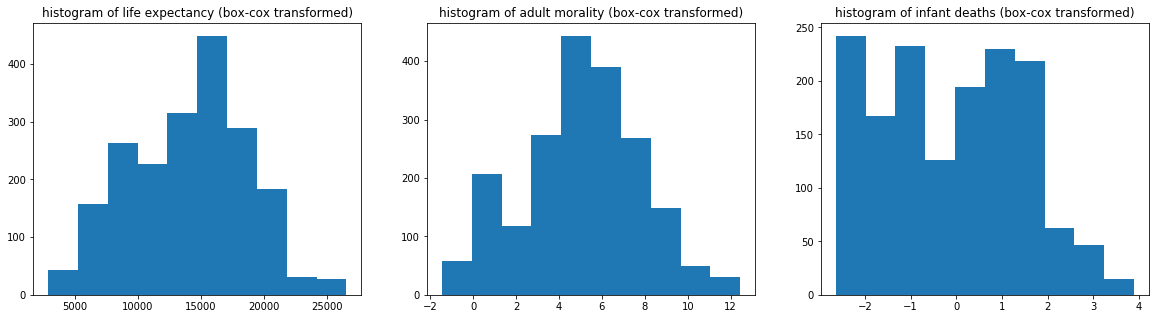

In [216]:
from scipy.stats import boxcox
life_expectancy_boxcox,_ = boxcox(df[df["life_expectancy"]>0]["life_expectancy"])
adulty_morality_boxcox,_ = boxcox(df["adult_morality"])
infant_deaths_boxcox,_ = boxcox(df[df["infant_deaths"]>0]["infant_deaths"])    

plt.figure(figsize= (20,5))

plt.subplot(1, 3, 1)
plt.hist(life_expectancy_boxcox)
plt.title("histogram of life expectancy (box-cox transformed)")
plt.subplot(1, 3, 2)
plt.hist(adulty_morality_boxcox)
plt.title("histogram of adult morality (box-cox transformed)")
plt.subplot(1, 3, 3)
plt.hist(infant_deaths_boxcox)
plt.title("histogram of infant deaths (box-cox transformed)")
plt.show()

In [217]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(life_expectancy_boxcox)
norm_stats = normaltest(life_expectancy_boxcox)

print("Jarque-Bera test statistics for life_expectancy is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(adulty_morality_boxcox)
norm_stats = normaltest(adulty_morality_boxcox)

print("JB test stat for adult_morality is {0}and p value is {1}".format (jb_stats[0], jb_stats[1]))
print ("Normality test stat is {0} and p value is {1}".format (norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics for life_expectancy is 29.19818920925175 and p value is 4.567660034648924e-07
Normality test statistics is 55.315235754865014 and p value is 9.73753817393007e-13
JB test stat for adult_morality is 12.165289623756768and p value is 0.0022821328520119533
Normality test stat is 15.902770748715657 and p value is 0.00035217393377774095


## Even after boxcox transformation the data is not normally distributed.

## Univariate analysis

### We have 22 variables, with 2938 data points, about 183 for each year

In [218]:
df.describe(include="all")

,country,year,status,life_expectancy,adult_morality,infant_deaths,alcohol,percentage_exp,hep_b,measles,...,diphtheria,hiv_aids,gdp,population,thinness_1-19yrs,thinness_5-9yrs,income_composition_of_resources,schooling,healthexp_usd,immunized
count,1987,1987.000000,1987,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,...,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000
unique,133,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,1702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2006.984902,NaN,67.981782,17.518722,3.662355,4.455644,685.492318,73.86160,272.956165,...,80.454454,2.274937,5392.335709,1.358390e+07,5.129995,5.199346,0.603453,11.639054,2.316723e+05,78.229324
std,NaN,4.323147,NaN,9.706401,13.161694,13.878491,3.976733,1761.669050,29.02807,1210.238914,...,24.450153,6.005112,11480.810350,6.490113e+07,4.750149,4.844382,0.206026,3.212964,1.208193e+06,21.775620
min,NaN,2000.000000,NaN,36.300000,0.100000,0.000000,0.010000,0.000000,2.00000,0.000000,...,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000e+00,2.666667
25%,NaN,2003.000000,NaN,61.700000,7.500000,0.100000,0.830000,29.469887,64.00000,0.000000,...,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000,1.155010e+02,65.666667
50%,NaN,2007.000000,NaN,69.900000,15.300000,0.400000,3.770000,104.314473,86.00000,2.000000,...,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000,1.357136e+03,86.000000
75%,NaN,2011.000000,NaN,74.700000,24.300000,2.500000,7.190000,470.870122,95.00000,49.950000,...,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000,2.112786e+04,95.333333


___
## Finding the strongest correlations BEFORE scaling
## (both positive and negative)

In [238]:
df.corr()['life_expectancy'].sort_values(ascending = False)

life_expectancy                    1.000000
pca_1                              0.864840
schooling                          0.744703
income_composition_of_resources    0.726753
bmi                                0.599572
gdp                                0.443612
diphtheria                         0.442943
immunized                          0.431546
polio                              0.415188
percentage_exp                     0.413683
alcohol                            0.392617
healthexp_usd                      0.259933
hep_b                              0.249625
total_exp                          0.199288
year                               0.171485
population                        -0.010840
measles                           -0.138133
infant_deaths                     -0.160922
under5_death                      -0.187438
thinness_5-9yrs                   -0.450095
thinness_1-19yrs                  -0.458724
hiv_aids                          -0.576373
adult_morality                  

In [225]:
df.corr()['life_expectancy'].abs().sort_values(ascending = False)[1:15]
corr = df[corr_variables + ['life_expectancy']].corr()['life_expectancy'][1:].sort_values(ascending = False)

## Plotting the above information

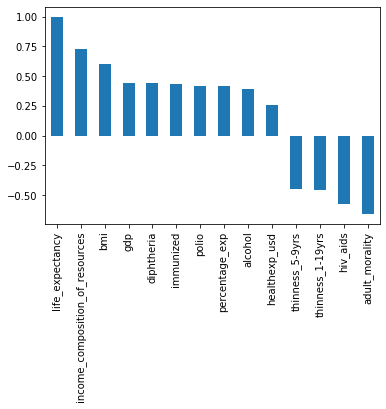

In [221]:
df[corr_variables + ['life_expectancy']].corr()['life_expectancy'][1:].sort_values(ascending = False).plot(kind = 'bar');

### If we wanted to look at the average change across all countries over the years:

### Univariate anlaysis:

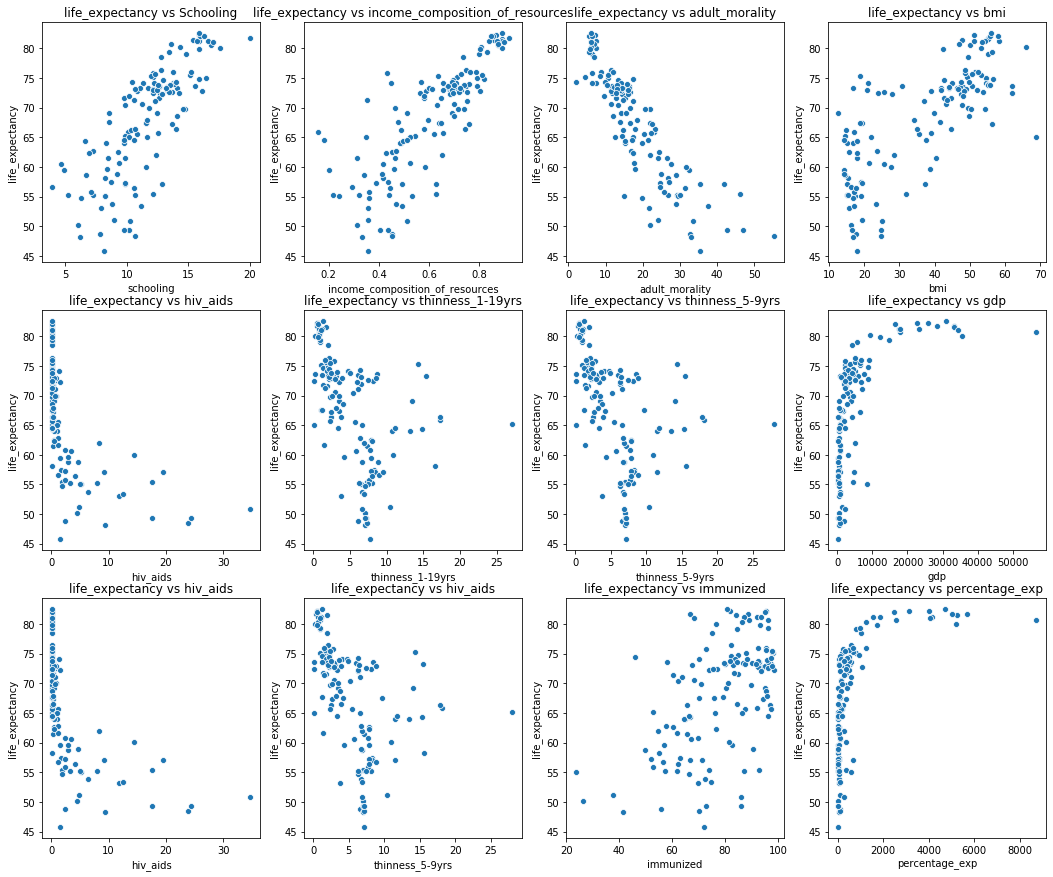

In [222]:
plt.figure(figsize=(18,15))
plt.subplot(3, 4, 1)
sns.scatterplot(df.groupby('country')['schooling'].mean(),df.groupby('country')['life_expectancy'].mean())
plt.title("life_expectancy vs Schooling")
plt.subplot(3, 4, 2)
sns.scatterplot(df.groupby('country')['income_composition_of_resources'].mean(),df.groupby('country')['life_expectancy'].mean())
plt.title("life_expectancy vs income_composition_of_resources")
plt.subplot(3, 4, 3)
sns.scatterplot(df.groupby('country')['adult_morality'].mean(),df.groupby('country')['life_expectancy'].mean())
plt.title("life_expectancy vs adult_morality")
plt.subplot(3, 4, 4)
sns.scatterplot(df.groupby('country')['bmi'].mean(),df.groupby('country')['life_expectancy'].mean())
plt.title("life_expectancy vs bmi")
plt.subplot(3, 4, 5)
sns.scatterplot(df.groupby('country')['hiv_aids'].mean(),df.groupby('country')['life_expectancy'].mean())
plt.title("life_expectancy vs hiv_aids")
plt.subplot(3, 4, 6)
sns.scatterplot(df.groupby('country')['thinness_1-19yrs'].mean(),df.groupby('country')['life_expectancy'].mean())
plt.title("life_expectancy vs thinness_1-19yrs")
plt.subplot(3, 4, 7)
sns.scatterplot(df.groupby('country')['thinness_5-9yrs'].mean(),df.groupby('country')['life_expectancy'].mean())
plt.title("life_expectancy vs thinness_5-9yrs")
plt.subplot(3, 4, 8)
sns.scatterplot(df.groupby('country')['gdp'].mean(),df.groupby('country')['life_expectancy'].mean())
plt.title("life_expectancy vs gdp")
plt.subplot(3, 4, 9)
sns.scatterplot(df.groupby('country')['hiv_aids'].mean(),df.groupby('country')['life_expectancy'].mean())
plt.title("life_expectancy vs hiv_aids")
plt.subplot(3, 4, 10)
sns.scatterplot(df.groupby('country')['thinness_5-9yrs'].mean(),df.groupby('country')['life_expectancy'].mean())
plt.title("life_expectancy vs hiv_aids")
plt.subplot(3, 4,11)
sns.scatterplot(df.groupby('country')['immunized'].mean(),df.groupby('country')['life_expectancy'].mean())
plt.title("life_expectancy vs immunized")
plt.subplot(3, 4, 12)
sns.scatterplot(df.groupby('country')['percentage_exp'].mean(),df.groupby('country')['life_expectancy'].mean())
plt.title("life_expectancy vs percentage_exp");

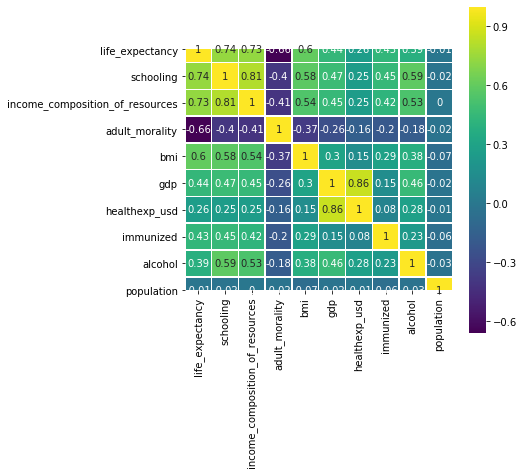

In [230]:
corr = df[["life_expectancy","schooling", "income_composition_of_resources","adult_morality","bmi","gdp","healthexp_usd","immunized","alcohol","population" ]].corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr.round(decimals=2), annot = True, square=True, cmap = 'viridis',linewidths=.5);

<BarContainer object of 16 artists>

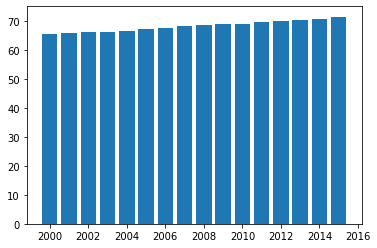

In [231]:
plt.bar(df.groupby("year")["life_expectancy"].mean().index,df.groupby("year")["life_expectancy"].mean())

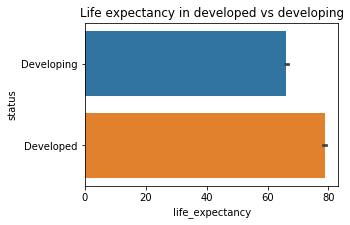

In [232]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
# draw the heatmap using seaborn.
sns.barplot(df["life_expectancy"], df["status"])
plt.title("Life expectancy in developed vs developing")

plt.show()

In [234]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = df[["life_expectancy","schooling", "income_composition_of_resources","adult_morality","bmi","gdp","healthexp_usd","immunized","alcohol","population"]]
x = StandardScaler().fit_transform(x)

sklearn_pca = PCA(n_components=1)

df["pca_1"] = sklearn_pca.fit_transform(x)

print('% of total variance explained by first component is', sklearn_pca.explained_variance_ratio_)

% of total variance explained by first component is [0.44391883]


In [236]:
corr = df[["life_expectancy","pca_1","schooling", "income_composition_of_resources","adult_morality","bmi","gdp","healthexp_usd","immunized","alcohol","population" ]].corr()
corr

,life_expectancy,pca_1,schooling,income_composition_of_resources,adult_morality,bmi,gdp,healthexp_usd,immunized,alcohol,population
life_expectancy,1.000000,0.864840,0.744703,0.726753,-0.660529,0.599572,0.443612,0.259933,0.431546,0.392617,-0.010840
pca_1,0.864840,1.000000,0.879326,0.853611,-0.582499,0.692338,0.676222,0.482461,0.503717,0.652295,-0.038392
schooling,0.744703,0.879326,1.000000,0.806551,-0.404160,0.584998,0.468299,0.247923,0.454496,0.590261,-0.024767
income_composition_of_resources,0.726753,0.853611,0.806551,1.000000,-0.411010,0.539862,0.450799,0.254644,0.416970,0.532173,0.001611
adult_morality,-0.660529,-0.582499,-0.404160,-0.411010,1.000000,-0.372519,-0.256955,-0.155101,-0.202161,-0.181469,-0.022403
bmi,0.599572,0.692338,0.584998,0.539862,-0.372519,1.000000,0.300517,0.150221,0.286780,0.379327,-0.071306
gdp,0.443612,0.676222,0.468299,0.450799,-0.256955,0.300517,1.000000,0.859389,0.145852,0.458112,-0.019751
healthexp_usd,0.259933,0.482461,0.247923,0.254644,-0.155101,0.150221,0.859389,1.000000,0.077211,0.282454,-0.012429
immunized,0.431546,0.503717,0.454496,0.416970,-0.202161,0.286780,0.145852,0.077211,1.000000,0.228591,-0.059398
alcohol,0.392617,0.652295,0.590261,0.532173,-0.181469,0.379327,0.458112,0.282454,0.228591,1.000000,-0.025556


### The correlation of the first principal component is higher than the schooling variable, which was the largest variable.

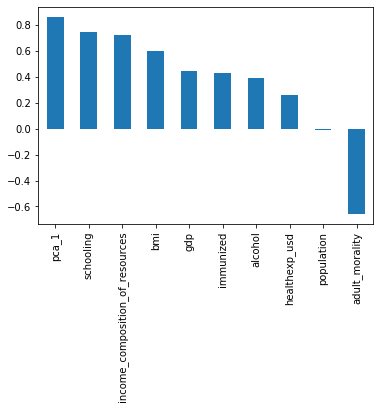

In [239]:
corr['life_expectancy'][1:].sort_values(ascending = False).plot(kind = 'bar');

### Factors that decrease Life Expectancy are Population, Measles, Thinness for children 1 -19 and Hiv_aids

### Factors that increase life expecatncy are Schooling, income composition of resources, GDP, Immunization and health care expenditure by the govt

### The first PCA explains the differnt factors better than any single variable and should be used in this case